In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
# notebook

In [2]:
all_data = pd.read_csv("G:/Shared drives/GEB Potential Study (NREL LBNL)/Baseline Load Shapes/Residential Baseline End Use Rough Round/Baseline from July 2019 ResStock Run.csv")

In [3]:
all_data.head()

epw                     time  \
0  USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 01:00:00.000   
1  USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 02:00:00.000   
2  USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 03:00:00.000   
3  USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 04:00:00.000   
4  USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 05:00:00.000   

   Building_Electricity   Heating  Central_System_Heating   Cooling  \
0              1.080209  0.426851                     0.0  0.000062   
1              1.134106  0.532303                     0.0  0.000000   
2              1.198597  0.614853                     0.0  0.000000   
3              1.249908  0.676217                     0.0  0.000000   
4              1.353743  0.764027                     0.0  0.000000   

   Central_System_Cooling  Water_Heating  Interior_Lights  Exterior_Lights  \
0                     0.0       0.014539         0.045194         0.009087   
1                     0.0       0.020510         0.027116         0.005452   
2                     0.0       0.023843         0.018078         0.003635   
3                     0.0       0.015838         0.018078         0.003635   
4                     0.0       0.025790         0.020098         0.004041   

        ...        Range_Fan  Bath_Fan  Ceiling_Fan  Hot_Tub_Heater_Electric  \
0       ...         0.000202  0.001629     0.020719                 0.002996   
1       ...         0.000134  0.001838     0.019165                 0.003620   
2       ...         0.000074  0.001855     0.019165                 0.002996   
3       ...         0.000240  0.001803     0.018647                 0.003620   
4       ...         0.000364  0.001846     0.017094                 0.005867   

   Hot_Tub_Pump  Pool_Heater_Electric  Pool_Pump  Well_Pump  Garage_Lighting  \
0      0.003635              0.000088   0.001610   0.007068         0.001104   
1      0.004392              0.000088   0.001610   0.003695         0.000662   
2      0.003635              0.000088   0.001610   0.003052         0.000441   
3      0.004392              0.000117   0.002147   0.002410         0.000441   
4      0.007118              0.000234   0.004295   0.002570         0.000491   

   Holiday_Lights  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 36 columns]

In [4]:
all_data['epw'].unique()

array(['USA_AZ_Tucson.Intl.AP.722740_TMY3.epw',
       'USA_CA_San.Diego-Lindbergh.Field.722900_TMY3.epw',
       'USA_CO_Boulder-Broomfield-Jefferson.County.AP.724699_TMY3.epw',
       'USA_FL_Orlando.Intl.AP.722050_TMY3.epw',
       'USA_GA_Atlanta-Hartsfield-Jackson.Intl.AP.722190_TMY3.epw',
       'USA_MN_International.Falls.Intl.AP.727470_TMY3.epw',
       'USA_MN_Rochester.Intl.AP.726440_TMY3.epw',
       'USA_MT_Great.Falls.Intl.AP.727750_TMY3.epw',
       'USA_NM_Albuquerque.Intl.AP.723650_TMY3.epw',
       'USA_NY_Buffalo-Greater.Buffalo.Intl.AP.725280_TMY3.epw',
       'USA_NY_New.York-J.F.Kennedy.Intl.AP.744860_TMY3.epw',
       'USA_TX_El.Paso.Intl.AP.722700_TMY3.epw',
       'USA_WA_Quillayute.State.AP.727970_TMY3.epw',
       'USA_WA_Seattle-Tacoma.Intl.AP.727930_TMY3.epw'], dtype=object)

In [102]:
city = 'USA_WA_Seattle-Tacoma.Intl.AP.727930_TMY3.epw'
city_data = all_data.loc[all_data['epw']==city].reset_index(drop=True)
len(city_data)

8760

In [103]:
city_data.columns

Index(['epw', 'time', 'Building_Electricity', 'Heating',
       'Central_System_Heating', 'Cooling', 'Central_System_Cooling',
       'Water_Heating', 'Interior_Lights', 'Exterior_Lights',
       'Interior_Equipment', 'Heating_Fans', 'Cooling_Fans', 'Heating_Fans.1',
       'Cooling_Pumps', 'Central_System_Heating_Pumps',
       'Central_System_Cooling_Pumps', 'Clothes_Washer',
       'Clothes_Dryer_Electric', 'Dishwasher', 'Refrigerator', 'Cooking_Range',
       'Extra_Refrigerator', 'Freezer', 'Plug_Loads', 'House_Fan', 'Range_Fan',
       'Bath_Fan', 'Ceiling_Fan', 'Hot_Tub_Heater_Electric', 'Hot_Tub_Pump',
       'Pool_Heater_Electric', 'Pool_Pump', 'Well_Pump', 'Garage_Lighting',
       'Holiday_Lights'],
      dtype='object')

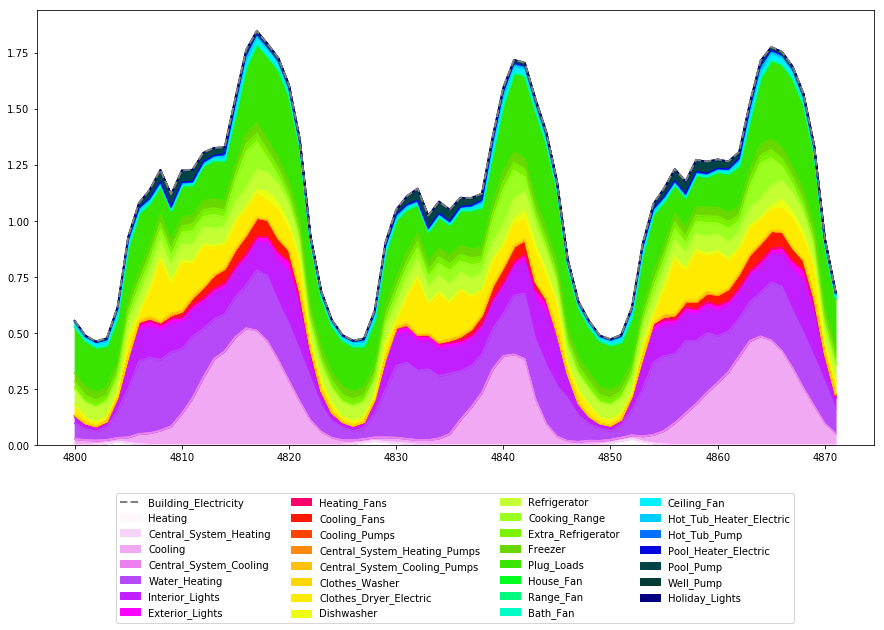

In [138]:
start_day = 200
ndays=3
sel_hrs = (city_data.index.values>=start_day*24) & (city_data.index.values<(start_day+ndays)*24)
sel_cols = city_data.columns[~city_data.columns.isin(['epw','time','Building_Electricity', 'Interior_Equipment', 'Heating_Fans.1', 'Garage_Lighting'])]
fig, ax=plt.subplots(1,1, figsize=(15,8))
city_data.loc[sel_hrs,sel_cols].plot.area(stacked=True, ax=ax, cmap=cm.get_cmap('gist_ncar_r'))
city_data.loc[sel_hrs, 'Building_Electricity'].plot(ax=ax, color='gray', linewidth=2, linestyle='--')
#plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.0,-0.05, 1.0, -0.05), ncol=4)

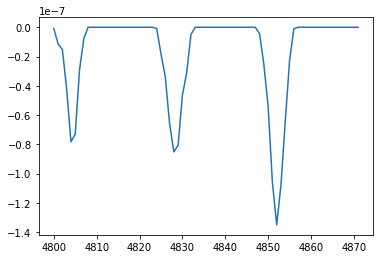

In [139]:
(city_data.loc[sel_hrs,sel_cols].sum(axis=1) - city_data.loc[sel_hrs,'Building_Electricity']).plot()

In [136]:
pd.set_option('display.max_columns', 500)
city_data.loc[sel_hrs,sel_cols].head()

Heating  Central_System_Heating   Cooling  Central_System_Cooling  \
2400  0.868330                     0.0  0.007879                     0.0   
2401  0.872006                     0.0  0.007569                     0.0   
2402  0.899133                     0.0  0.007630                     0.0   
2403  0.947282                     0.0  0.007982                     0.0   
2404  0.897669                     0.0  0.007595                     0.0   

      Water_Heating  Interior_Lights  Exterior_Lights  Heating_Fans  \
2400       0.099038         0.026569         0.005279      0.081603   
2401       0.065358         0.017713         0.003519      0.081134   
2402       0.047572         0.017713         0.003519      0.083347   
2403       0.061180         0.018937         0.003763      0.088624   
2404       0.122842         0.050264         0.009987      0.083783   

      Cooling_Fans  Cooling_Pumps  Central_System_Heating_Pumps  \
2400  6.821901e-06            0.0                           0.0   
2401  0.000000e+00            0.0                           0.0   
2402  1.266946e-07            0.0                           0.0   
2403  1.296083e-05            0.0                           0.0   
2404  6.656842e-05            0.0                           0.0   

      Central_System_Cooling_Pumps  Clothes_Washer  Clothes_Dryer_Electric  \
2400                           0.0        0.000958                0.035037   
2401                           0.0        0.000901                0.020040   
2402                           0.0        0.001111                0.018708   
2403                           0.0        0.000777                0.022785   
2404                           0.0        0.003691                0.016980   

      Dishwasher  Refrigerator  Cooking_Range  Extra_Refrigerator   Freezer  \
2400    0.000369      0.068385       0.008189            0.028178  0.036997   
2401    0.000787      0.066632       0.004679            0.027455  0.036049   
2402    0.001985      0.064878       0.004679            0.026733  0.035100   
2403    0.000461      0.063125       0.008189            0.026010  0.034151   
2404    0.001152      0.063125       0.012868            0.026010  0.034151   

      Plug_Loads  House_Fan  Range_Fan  Bath_Fan  Ceiling_Fan  \
2400    0.247174        0.0   0.000126  0.001672     0.014931   
2401    0.247174        0.0   0.000136  0.001554     0.014931   
2402    0.240494        0.0   0.000219  0.001617     0.014527   
2403    0.220452        0.0   0.000308  0.001857     0.013316   
2404    0.240494        0.0   0.000814  0.001722     0.014527   

      Hot_Tub_Heater_Electric  Hot_Tub_Pump  Pool_Heater_Electric  Pool_Pump  \
2400                 0.003561      0.004320              0.000076   0.001396   
2401                 0.002947      0.003575              0.000076   0.001396   
2402                 0.003561      0.004320              0.000101   0.001861   
2403                 0.005771      0.007002              0.000203   0.003722   
2404                 0.008226      0.009981              0.000380   0.006978   

      Well_Pump  Holiday_Lights  
2400   0.003202             0.0  
2401   0.002645             0.0  
2402   0.002088             0.0  
2403   0.002227             0.0  
2404   0.002506             0.0